In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import SpectralEmbedding

path = "/home/ubuntu/onekgenomes/"
sampleDataFile = "data/sampleData/sampleData.tsv"
df = pd.read_csv(path + sampleDataFile, sep='\t', index_col=0)

In [2]:
pops = df["Population"].tolist()
uniquePops = list(set(pops))
uniquePops.sort()
numSamples = len(pops)
targetDict = dict(zip(uniquePops, range(numSamples)))
Y = np.array([targetDict[pop] for pop in pops])

In [3]:
superPops = df["Super Population"].tolist()
uniquePops = list(set(superPops))
uniquePops.sort()
numSamples = len(superPops)
targetDict = dict(zip(uniquePops, range(numSamples)))
Y = np.array([targetDict[p] for p in superPops])

In [4]:
genders = df["Gender"]
G = (genders == "male").values

In [5]:
pdistMat = np.load(path + "data/pdist/summedMats/pdistAll.npy")
sigmaSq = np.quantile(pdistMat.reshape(-1), 0.1)
gamma = 1 / (2 * sigmaSq)
K_all = np.exp(-gamma * pdistMat)
numComp = 4
embedding = SpectralEmbedding(affinity="precomputed", n_components=numComp)
embeddedData = embedding.fit_transform(K_all)
embeddedData.shape
x, y, z, w = np.hsplit(embeddedData, numComp)

In [6]:
pdistMat = np.load(path + "data/pdist/summedMats/pdistNum.npy")
sigmaSq = np.quantile(pdistMat.reshape(-1), 0.1)
gamma = 1 / (2 * sigmaSq)
K_num = np.exp(-gamma * pdistMat)
numComp = 3
embedding = SpectralEmbedding(affinity="precomputed", n_components=numComp)
embeddedData = embedding.fit_transform(K_num)
embeddedData.shape
x1, y1, z1 = np.hsplit(embeddedData, numComp)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax1 = fig.add_subplot(221, projection="3d")
cmap = cm.rainbow(Y / np.max(Y))
ax1.scatter(x, y, z, c=cmap)
ax2 = fig.add_subplot(222, projection="3d")
genderCmap = np.zeros((numSamples,))
genderCmap[G] = 1
ax2.scatter(x, y, z, c=genderCmap)
ax3 = fig.add_subplot(223, projection="3d")
ax3.scatter(x1, y1, z1, c=cmap)

<IPython.core.display.Javascript object>


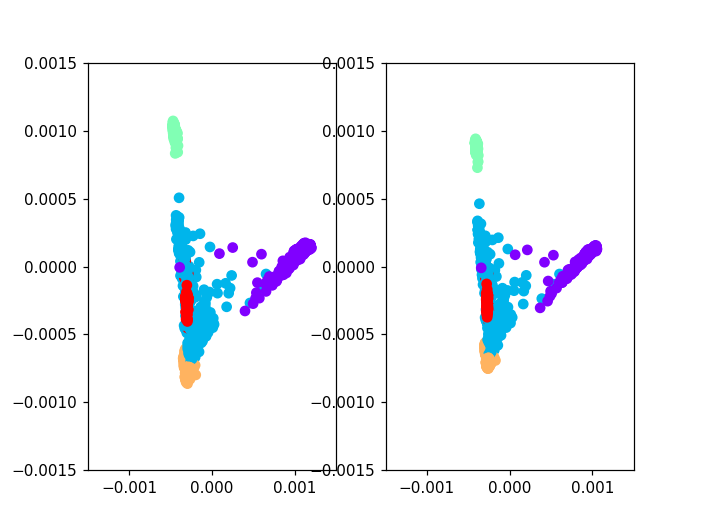

(-0.0015, 0.0015)

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig2 = plt.figure()
ax4 = fig2.add_subplot(121)
cmap = cm.rainbow(Y / np.max(Y))
ax4.scatter(y,z, c=cmap)
ax4.set_xlim(-0.0015,0.0015)
ax4.set_ylim(-0.0015,0.0015)
ax5 = fig2.add_subplot(122)
ax5.scatter(x1, y1, c=cmap)
ax5.set_xlim(-0.0015,0.0015)
ax5.set_ylim(-0.0015,0.0015)


